# SO bands
plot them, look at centers, etc

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
!ls det_bands

SO_v3r7_Baseline     chlat_20210115_bands
SO_v3r7_goal_bands   flatbands


SO_v3r7_Baseline/
UHF_2.txt    : 285.80   55.12
UHF_1.txt    : 226.54   55.34
MF_2.txt     : 147.24   35.88
MF_1.txt     :  92.82   28.65
LF_1.txt     :  25.83    8.27
LF_2.txt     :  38.96   16.84

SO_v3r7_goal_bands/
UHF_2.txt    : 285.80   55.12
UHF_1.txt    : 226.54   55.34
MF_2.txt     : 147.24   35.88
MF_1.txt     :  92.82   28.65
LF_1.txt     :  25.83    8.27
LF_2.txt     :  38.96   16.84

chlat_20210115_bands/
UHF_2.txt    : 285.80   55.12
UHF_1.txt    : 226.54   55.34
MF_2.txt     : 148.18   37.87
MF_1.txt     :  91.76   28.51
LF_1.txt     :  25.76    8.35
LF_2.txt     :  38.96   16.84



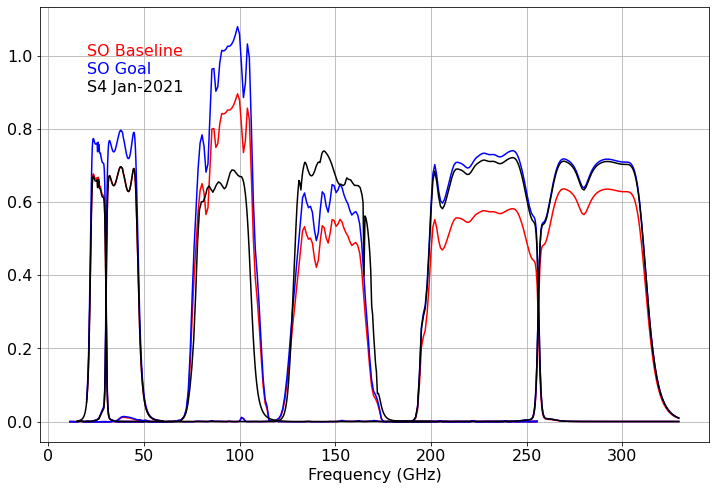

In [27]:
bandfiles = ['LF_1.txt', 'LF_2.txt','MF_1.txt','MF_2.txt','UHF_1.txt','UHF_2.txt']

detdir = 'det_bands/'
versions = ['SO_v3r7_Baseline/', 'SO_v3r7_goal_bands/', 'chlat_20210115_bands/']
colors = {versions[0]:'r',versions[1]:'b',versions[2]:'k'}

for version in versions:
    tubes = os.listdir(detdir+version)
    print(version)
    for tube in tubes:
        detpath = detdir+version+tube+'/'
        ny = len(tubes)
        ii = 1
        bandfiles = os.listdir(detpath)
        plt.gca().set_prop_cycle(None)
        for band in bandfiles:
            fullpath = detpath+band
            f,b = np.loadtxt(fullpath, unpack=True)
            plt.plot(f,b,colors[version])
            b = b/np.max(b)
            bw = np.trapz(b,f)
            center = np.trapz(f*b,f)/bw
            print('{0:12s} : {1:6.2f}  {2:6.2f}'.format(band,center,bw))
    print('')
        

xtext = 20
plt.text(xtext,1.0,'SO Baseline',color='red')
plt.text(xtext,0.95,'SO Goal',color='blue')
plt.text(xtext,0.9,'S4 Jan-2021',color='black')
plt.xlabel('Frequency (GHz)')
plt.grid()





    

# Filter bands

In [12]:
os.listdir('filter_bands/SO_v3r7_Baseline')

['UHF', 'MF', 'LF']

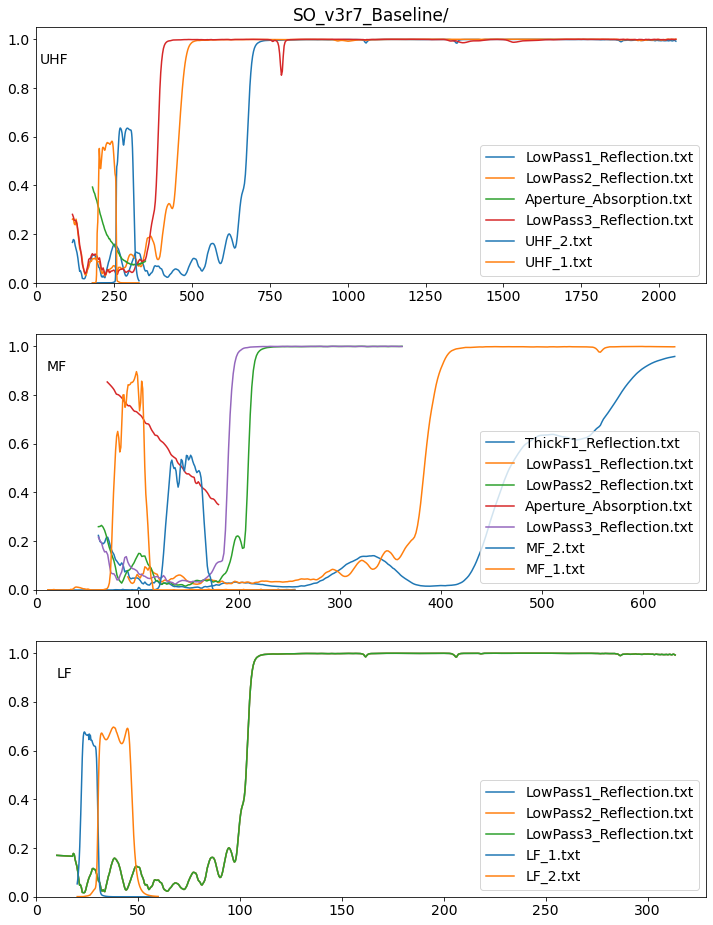

In [33]:
plt.rcParams['figure.figsize'] = [12,16]
plt.rcParams.update({'font.size': 14})

filtdir = 'filter_bands/'
detdir = 'det_bands/'
version = 'SO_v3r7_Baseline/'
tubes = os.listdir(filtdir+version)

ny = len(tubes)
ii = 1

for tube in tubes:
    plt.subplot(ny,1,ii)
    if ii == 1 : plt.title(version)
    plt.text(10,0.9,tube)
    
    # Filter bands
    filtpath = filtdir+version+tube+'/'
    bandfiles = os.listdir(filtpath)
    plt.gca().set_prop_cycle(None)
    for band in bandfiles:
        fullpath = filtpath+band
        f,b = np.loadtxt(fullpath, unpack=True)
        plt.plot(f,b,label=band)
        
    # Detector bands
    detpath = detdir+version+tube+'/'
    bandfiles = os.listdir(detpath)
    plt.gca().set_prop_cycle(None)
    for band in bandfiles:
        fullpath = detpath+band
        f,b = np.loadtxt(fullpath, unpack=True)
        plt.plot(f,b,label=band)
        
    plt.xlim(0)
    plt.ylim(0)
    plt.legend(loc='lower right')
    
    ii = ii+1




# LAT bands with CO lines marked
Lines from Jacques Delabrouville
<code>
88.6304  HCN J=1-0,F=1-1
88.6316  HCN J=1-0
88.6319  HCN J=1-0,F=2-1
88.6339  HCN J=1-0,F=0-1
89.1885  HCO+ 1-0
109.782  C18O J=1-0
110.201  13CO J=1-0
112.359  C17O J=1-0
115.271  CO J=1-0
177.26  HCN J=2-1,F=2-2
177.26  HCN J=2-1,F=1-0
177.261  HCN J=2-1
177.261  HCN J=2-1,F=2-1
177.261  HCN J=2-1,F=3-2
177.262  HCN J=2-1,F=1-2
177.263  HCN J=2-1,F=1-1
178.375  HCO+ 2-1
219.56  C18O J=2-1
220.399  13CO J=2-1
224.714  C17O J=2-1
230.538  CO J=2-1
265.885  HCN J=3-2,F=3-3
265.886  HCN J=3-2,F=2-1
265.886  HCN J=3-2,F=3-2
265.886  HCN J=3-2
265.887  HCN J=3-2,F=4-3
265.889  HCN J=3-2,F=2-2
267.558  HCO+ 3-2
</code>

In [15]:
COlines = {
    'C18O J=1-0': 109.782,  
    '13CO J=1-0': 110.201,  
    'C17O J=1-0': 112.359, 
    'CO J=1-0': 115.271,
    'C18O J=2-1': 219.56,
    '13CO J=2-1': 220.399,
    'C17O J=2-1': 224.714,
    'CO J=2-1': 230.538  
}
yposvec = [0.95,0.9,0.85,0.8,0.95,0.9,0.85,0.8]

chlat_20210115_bands/
UHF_2.txt    : 285.80   55.12
UHF_1.txt    : 226.54   55.34
MF_2.txt     : 148.18   37.87
MF_1.txt     :  91.76   28.51
LF_1.txt     :  25.76    8.35
LF_2.txt     :  38.96   16.84



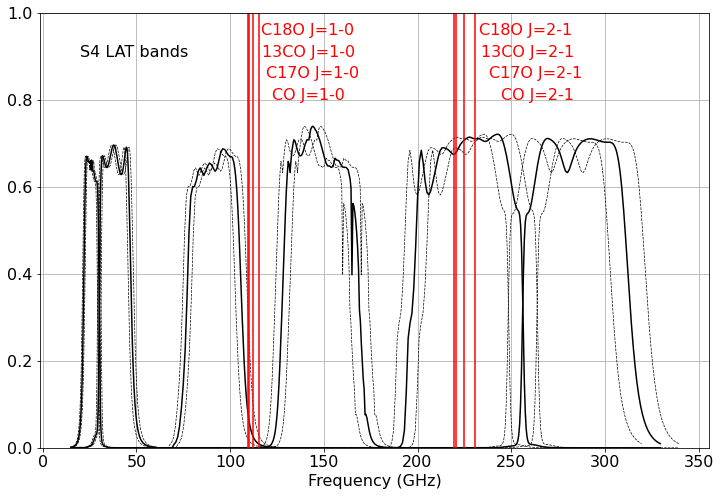

In [29]:
bandfiles = ['LF_1.txt', 'LF_2.txt','MF_1.txt','MF_2.txt','UHF_1.txt','UHF_2.txt']

detdir = 'det_bands/'
versions = ['SO_v3r7_Baseline/', 'SO_v3r7_goal_bands/', 'chlat_20210115_bands/']
colors = {versions[0]:'r',versions[1]:'b',versions[2]:'k'}

version = versions[2]

tubes = os.listdir(detdir+version)
print(version)
for tube in tubes:
    detpath = detdir+version+tube+'/'
    ny = len(tubes)
    ii = 1
    bandfiles = os.listdir(detpath)
    plt.gca().set_prop_cycle(None)
    for band in bandfiles:
        fullpath = detpath+band
        f,b = np.loadtxt(fullpath, unpack=True)
        plt.plot(f,b,colors[version])
        plt.plot(1.03*f,b,'--',color=colors[version], linewidth=0.7)
        plt.plot(0.97*f,b,'--',color=colors[version], linewidth=0.7)
        b = b/np.max(b)
        bw = np.trapz(b,f)
        center = np.trapz(f*b,f)/bw
        print('{0:12s} : {1:6.2f}  {2:6.2f}'.format(band,center,bw))
print('')

xtext = 20
plt.text(xtext,0.9,'S4 LAT bands',color='black')
plt.xlabel('Frequency (GHz)')
plt.ylim(0,1)
plt.grid()

yvec = np.array([0,1])
ii = 0
for line in COlines.keys():
    x = COlines[line]
    xvec = np.array([x,x])
    plt.plot(xvec,yvec,'r')
    plt.text(1.06*x,yposvec[ii],line,color='red')
    ii=ii+1

In [4]:
!ls

ApertureFuncs     Notes.md          det_bands         test.txt
BandPlots.ipynb   README.md         filter_bands      yamls
Jbolo_nb.ipynb    SOS4_comp.ipynb   input_notes
Jbolo_vary1.ipynb __pycache__       outputs
LICENSE           atmos             python
